In [16]:
'''Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"'''

'Use decision trees to prepare a model on fraud data \ntreating those who have taxable_income <= 30000 as "Risky" and others are "Good"'

In [1]:
import pandas as pd 
import numpy as np 


In [2]:
fraud = pd.read_csv("Fraud_check.csv")

In [3]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fraud.shape

(600, 6)

In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
fraud.sample(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
565,NO,Divorced,63912,31064,28,NO
367,YES,Married,29607,95404,24,YES
576,YES,Married,50242,79653,15,YES
461,NO,Single,88613,163901,6,YES
233,NO,Married,10003,63701,19,YES


In [10]:
fraud["Marital.Status"].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [11]:
fraud["Marital.Status"].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [17]:
fraud.loc[fraud["Taxable.Income"] <=30000 ,'Beliving'] ='Risky'
fraud.loc[fraud["Taxable.Income"]>30000 ,'Beliving'] = 'Good'

In [18]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Beliving
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [22]:
fraud1=fraud.drop(['Taxable.Income'],axis=1)

In [39]:
fraud1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Beliving
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [52]:
fraud1.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'Beliving'],
      dtype='object')

In [40]:
#converting string to int
label_encoder = preprocessing.LabelEncoder()
fraud1['Undergrad'] = label_encoder.fit_transform(fraud1['Undergrad'])
fraud1['Marital.Status'] = label_encoder.fit_transform(fraud1['Marital.Status'])
fraud1['Urban'] = label_encoder.fit_transform(fraud1['Urban'])

# Dividing the data into X-variable and Y-variable

In [42]:
x = fraud1.iloc[:,0:-1]
y = fraud1.iloc[:,-1]

In [43]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [44]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Beliving, Length: 600, dtype: object

# splitting the data into train and test

In [45]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10,shuffle=True)


In [47]:
y_train

284    Risky
423     Good
525     Good
519     Good
12     Risky
       ...  
369     Good
320     Good
527     Good
125     Good
265    Risky
Name: Beliving, Length: 480, dtype: object

# Building Decision tree model

# By using the gini criterion

In [85]:
model_gini = DecisionTreeClassifier(criterion='gini',min_samples_split=4,max_depth=5)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=4)

In [86]:
import matplotlib.pyplot as plt

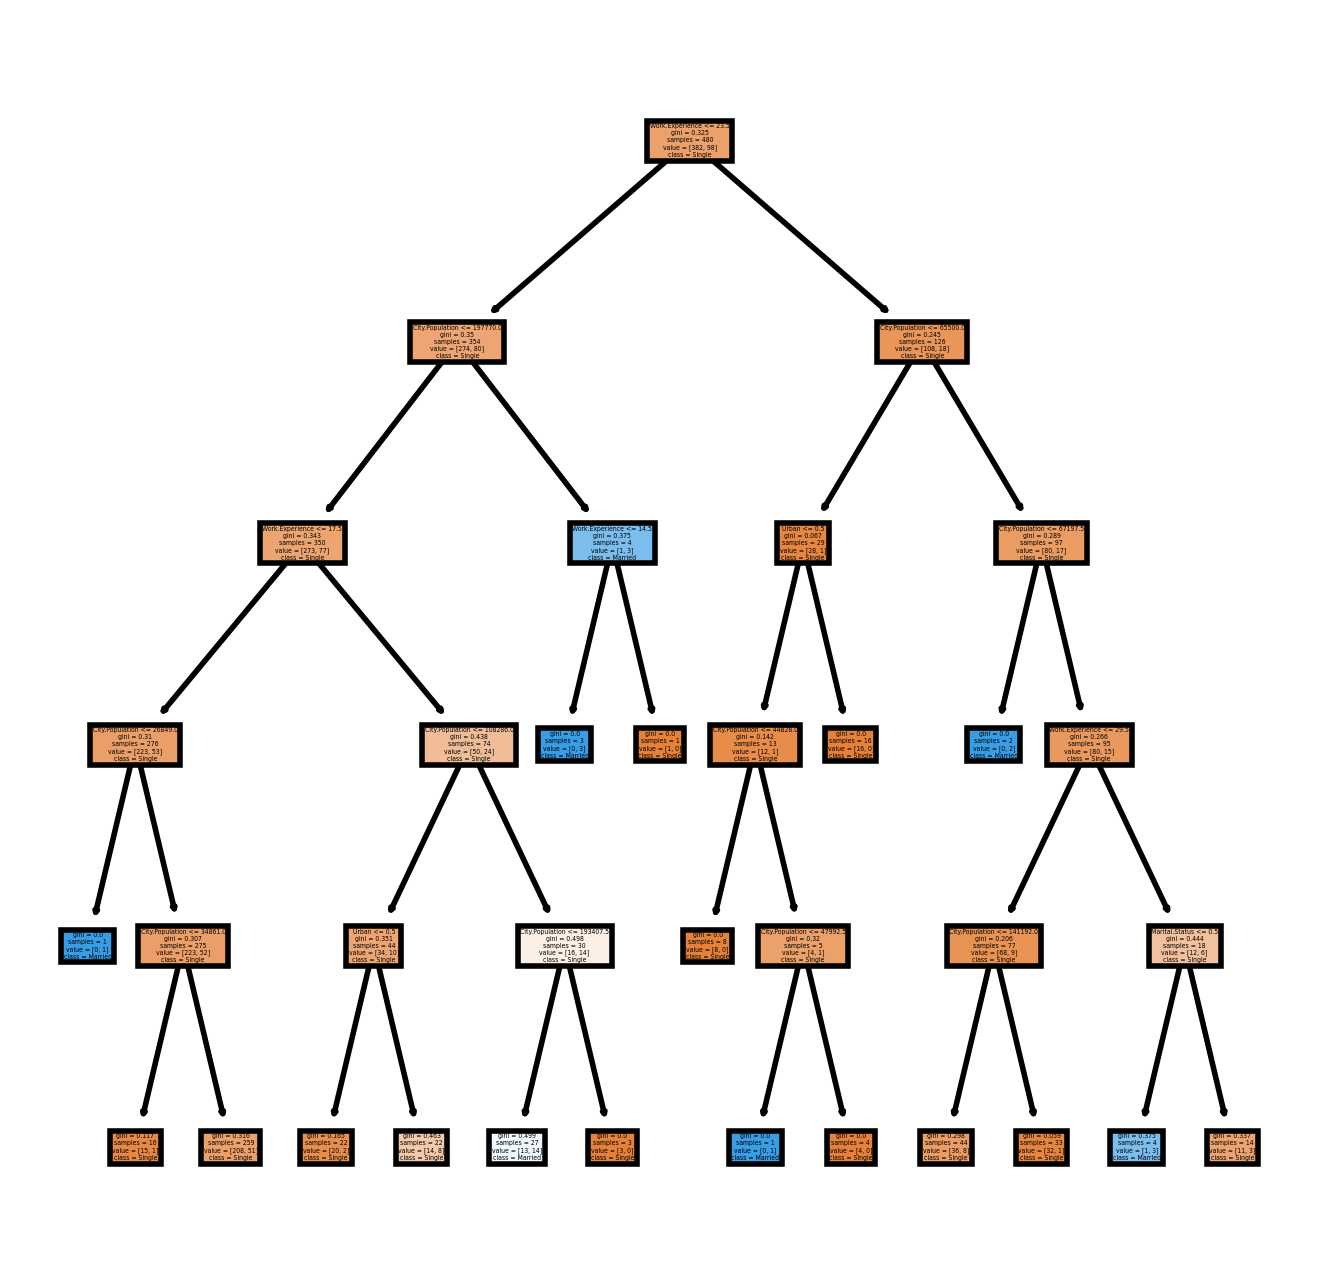

In [87]:
fn = ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience','Urban']
cn = ["Single","Married","Divorsed"]
fig , axis = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4) , dpi = 400)
tree.plot_tree(model_gini,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [88]:
preds = model_gini.predict(x_test)
pd.Series(preds).value_counts()

Good     107
Risky     13
dtype: int64

In [89]:
from sklearn import metrics
metrics.accuracy_score(preds,y_test)

0.7083333333333334

# by using the entropey criteration

In [92]:

model_entropy = DecisionTreeClassifier(criterion='entropy' , max_depth=5)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [93]:
preds = model_entropy.predict(x_test)
metrics.accuracy_score(preds,y_test)

0.7166666666666667